<a href="https://colab.research.google.com/github/GioAcosta1/Proyecto_Final_Cancer_de_Piel/blob/Dayana/Copia_Dayana_DETECCION_Y_CLASIFICACION_DE_CANCER_DE_PIEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Montaje de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Ordenamiento de las imágenes**

In [ ]:
#Descomprimir base de datos de imágenes
import io
import zipfile
import os
import glob


!unzip "/content/drive/MyDrive/Deep learning/PF_Cancer_piel/DATASET.zip" -d "/content/drive/MyDrive/Deep Learning/PF_Cancer_piel/DATASET"

unzip:  cannot find or open /content/drive/MyDrive/Deep learning/PF_Cancer_piel/DATASET.zip, /content/drive/MyDrive/Deep learning/PF_Cancer_piel/DATASET.zip.zip or /content/drive/MyDrive/Deep learning/PF_Cancer_piel/DATASET.zip.ZIP.


In [ ]:
#Librerias a utilizar
import pandas as pd
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from PIL import Image

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix

In [ ]:
#Lectura de metadata

data_skin = pd.read_csv('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/HAM10000_metadata.csv')


FileNotFoundError: ignored

NameError: ignored

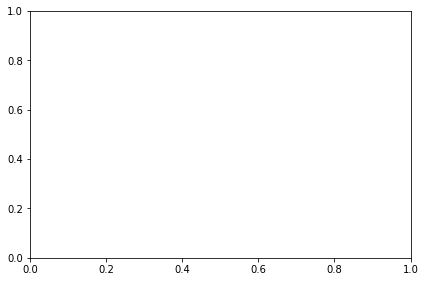

In [ ]:
#Ver la distribución de los datos
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
data_skin['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Cantidad')
ax1.set_title('Tipo de cáncer');

ax2 = fig.add_subplot(222)
data_skin['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Cantidad', size=15)
ax2.set_title('Sexo');

ax3 = fig.add_subplot(223)
data_skin['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Cantidad',size=12)
ax3.set_title('Localización anatómica')

ax4 = fig.add_subplot(224)
sample_age = data_skin[pd.notnull(data_skin['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Edad')

plt.tight_layout()
plt.show()

In [ ]:
#Etiquetado

l_encode = LabelEncoder()
l_encode.fit(data_skin['dx'])
LabelEncoder()
print(list(l_encode.classes_))

NameError: ignored

In [ ]:
data_skin['label'] = l_encode.transform(data_skin['dx'])
print(data_skin.sample(10))

NameError: ignored

In [ ]:
df_type_0 = data_skin[data_skin['dx']=='akiec']
df_type_1 = data_skin[data_skin['dx']=='bcc']
df_type_2 = data_skin[data_skin['dx']=='bkl']
df_type_3 = data_skin[data_skin['dx']=='df']
df_type_4 = data_skin[data_skin['dx']=='mel']
df_type_5 = data_skin[data_skin['dx']=='nv']
df_type_6 = data_skin[data_skin['dx']=='vasc']

len(df_type_2)

NameError: ignored

In [ ]:
print(data_skin['dx'].value_counts())

NameError: ignored

In [ ]:
#Balancear base de datos

from sklearn.utils import resample

df_type_0_bal = resample(df_type_0, replace=True, n_samples = 400, random_state=42)
df_type_1_bal = resample(df_type_1, replace=True, n_samples = 400, random_state=42)
df_type_2_bal = resample(df_type_2, replace=True, n_samples = 400, random_state=42)
df_type_3_bal = resample(df_type_3, replace=True, n_samples = 400, random_state=42)
df_type_4_bal = resample(df_type_4, replace=True, n_samples = 400, random_state=42)
df_type_5_bal = resample(df_type_5, replace=True, n_samples = 400, random_state=42)
df_type_6_bal = resample(df_type_6, replace=True, n_samples = 400, random_state=42)

data_skin_bal = pd.concat([df_type_0_bal, df_type_1_bal, df_type_2_bal,
                           df_type_3_bal, df_type_4_bal, df_type_5_bal,
                           df_type_6_bal])

NameError: ignored

In [ ]:
import glob
image_path = glob.glob('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Orgaizacion_data/Clases/**/*.jpg')

In [ ]:
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/akiec/')
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/bcc/')
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/bkl/')
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/df/')
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/mel/')
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/nv/')
os.mkdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/vasc/')

FileNotFoundError: ignored

In [ ]:
for id in data_skin_bal['image_id']:
  find_path = [s for s in image_path if id in s]
  for path in find_path:
    p = path.split('/')
    if 'akiec' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/akiec/')
    elif 'bcc' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/bcc/')
    elif 'bkl' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/bkl/')
    elif 'df' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/df/')
    elif 'mel' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/mel/')
    elif 'nv' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/nv/')
    elif 'vasc' in p:
      shutil.copy(path,'/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/vasc/') 



NameError: ignored

In [ ]:
arc_akiec = os.listdir('/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Total_HAM/bcc/')
len(arc_akiec)

FileNotFoundError: ignored

# **Creación de Data Generator**

In [ ]:
data_generator = ImageDataGenerator(validation_split = 0.15)

In [ ]:
path_classes = '/content/drive/MyDrive/Deep learning/PF_Cancer_piel/Organizacion_data/Clases/'
train_image_generator = data_generator.flow_from_directory(
    directory = path_classes,
    class_mode = 'categorical',
    batch_size = 16,
    target_size = (64,64),
    subset = 'training'
)
val_image_generator = data_generator.flow_from_directory(
    directory = path_classes,
    class_mode = 'categorical',
    batch_size = 16,
    target_size = (64, 64),
    subset = 'validation'
)

FileNotFoundError: ignored

In [ ]:
x, y = next(train_image_generator)
classes = train_image_generator.class_indices
fig = plt.figure(figsize=(15,14))
fig.suptitle('Cáncer de piel')
for i in range(0, 16):
  plt.subplot(4,4,i+1)
  image = x[i].astype(int)
  y_search = y[i,:]
  idx = list(np.where(y_search==1))
  n_type = list(classes.keys())[list(classes.values()).index(idx[0])]
  fig.add_subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(n_type)
  plt.xticks([])
  plt.yticks([])
  n_type = ''

NameError: ignored

# **Definición de red neuronal convolucional**

In [ ]:
n_classes = 7

model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2,)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2,)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2,)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 128)       0

# **Entrenamiento de la red neuronal convolucional**

In [ ]:
num_epochs = 100
history = model.fit(
    train_image_generator,
    steps_per_epoch = train_image_generator.samples//train_image_generator.batch_size,
    validation_data = val_image_generator,
    validation_steps = val_image_generator.samples // val_image_generator.batch_size,
    epochs = num_epochs)

NameError: ignored

In [ ]:
#score = model.evaluate(x_test, y_test)
#print('Test accuracy:', score[1])

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

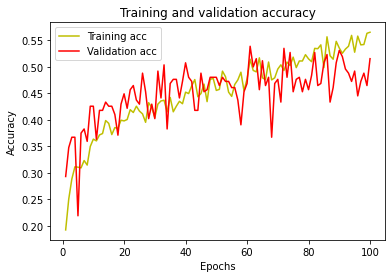

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
image_test = Image.open('/content/melanoma.jpg')
image_test_resize = image_test.resize((32,32))

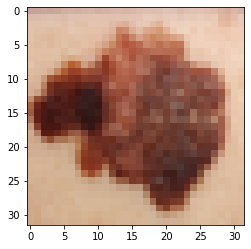

In [ ]:
plt.imshow(image_test_resize)

In [ ]:
image_test_resize = np.array(image_test_resize)
nn = image_test_resize.reshape(1,32,32,3)

pred = model.predict(nn)
print(pred)
pred_class = np.argmax(pred, axis=1)

1/1 [==============================] - 0s 24ms/step
[[1.7193703e-02 1.4434011e-03 5.2206405e-02 6.9435919e-04 7.5322223e-01
  1.7518704e-01 5.2806809e-05]]


4